<a href="https://colab.research.google.com/github/sakshi2215/Machine_learning/blob/main/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New variable from old variable to get a insightful information from the data by analyzing the data.

1.   Feature Binning
2.   Feature Encoding
3.   from Domain Knowledge
4.   Calculated from Data



**Feature Binning**- Supervised and Unsupervised binning
`**Unsupervized**- Equal width, Equal frequency`
`**Supervized**- Entropy based`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preproessing

ImportError: cannot import name 'preproessing' from 'sklearn' (/usr/local/lib/python3.10/dist-packages/sklearn/__init__.py)

In [2]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Age.min()


18

In [7]:
df.Age.max()

92

In [14]:
labels=['0-20','21-40','41-60','Above 61']
bins=[0,20,40,60,100]
df['Age_bins'] = pd.cut(df.Age,bins,labels=labels, include_lowest =True)

In [15]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age-bins,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,41-60


In [16]:
df.Age_bins.value_counts()

21-40       6330
41-60       3117
Above 61     464
0-20          89
Name: Age_bins, dtype: int64

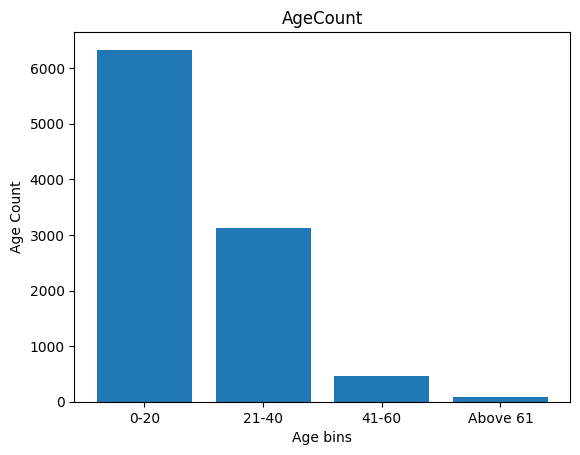

In [19]:
#making the bar chart on the data
plt.bar(labels,df.Age_bins.value_counts())
plt.title('AgeCount')
plt.xlabel('Age bins')
plt.ylabel('Age Count')
plt.show()

In [20]:
def add_labwl(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

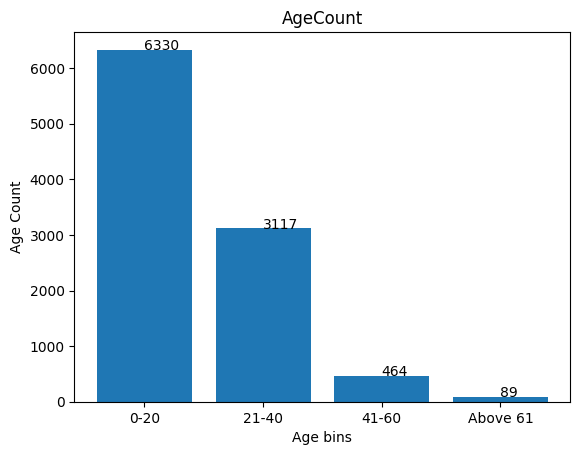

In [22]:
#making the bar chart on the data
plt.bar(labels,df.Age_bins.value_counts())
add_labwl(labels,df.Age_bins.value_counts())
plt.title('AgeCount')
plt.xlabel('Age bins')
plt.ylabel('Age Count')
plt.show()

**Feature Encoding**


*   Label Encoding
*   One Hot ENcoding
*   Target Encoding
*   Hash Encoder



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

**Label Encoding**

In [7]:
le = preprocessing.LabelEncoder()
df['Gender_Label'] = le.fit_transform(df.Gender.values)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [10]:
df.Gender_Label.value_counts()

1    5457
0    4543
Name: Gender_Label, dtype: int64

**One Hot Encoding**

In [13]:
one_hot =pd.get_dummies(df['Geography'])
one_hot

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [15]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Label,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,1,0


**Dummy Encoding**

In [16]:
df_dummies_de = pd.get_dummies(df,drop_first=True)

In [17]:
df_dummies_de.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Label,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0


**Target Encoding**

In [18]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [21]:
from category_encoders import TargetEncoder

In [23]:
encoder = TargetEncoder()
df1= pd.read_csv('/content/Churn_Modelling.csv')
df1.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df1['Gender_Encoded'] = encoder.fit_transform(df1['Gender'],df1['Exited'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.250715
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.250715
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.250715
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.250715
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.250715


In [25]:
df1.Gender_Encoded.value_counts()

0.164559    5457
0.250715    4543
Name: Gender_Encoded, dtype: int64

Target Encoding is quick and simple encoding and it does not add dimensionality of the data
1. it is dependent on target distribution which means target encoding requires careful validation as it can be pronw to overfitting

**Hash encoding**

In [28]:
from category_encoders import HashingEncoder

In [29]:
x=df.Gender
y=df.Exited

In [30]:
ce_hash = HashingEncoder(cols=['Gender'])
ce_hash.fit_transform(x,y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0
9996,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,1,0,0


In [31]:
x=df.Geography
y=df.Exited
ce_hash = HashingEncoder(cols=['Geography'])
ce_hash.fit_transform(x,y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,1
